In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np

In [6]:
# Dataset link - https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# Dropping last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Renaming our columns
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [14]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# Now we will do label encoding of our target column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [20]:
df['target'] = encoder.fit_transform(df['target'])

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
# Checking Missing values
df.isna().sum()

target    0
text      0
dtype: int64

In [23]:
# Checking Duplicated values
df.duplicated().sum()

403

In [25]:
# Removing duplicate values
df = df.drop_duplicates()

In [26]:
df.duplicated().sum()

0

In [27]:
df.shape

(5169, 2)

2. EDA

In [29]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

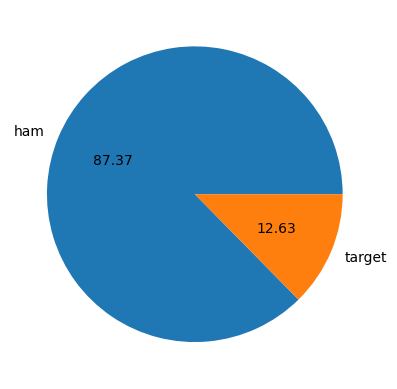

In [36]:
# importing matplitlib library to plot pie chart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','target'],  autopct='%0.2f')
plt.show()

In [ ]:
# from the above code we can see that our data is hugely imbalanced

In [37]:
# now installing nltk to work with textual data
!pip install nltk

In [39]:
# Now we will do some feature engineering using nltk library
import nltk

In [40]:
# downloading required packages 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shahb\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [48]:
# downloading required packages
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shahb\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [42]:
# Creating new column containing num of characters in out text column
df['num_char'] = df['text'].apply(len)

In [51]:
# Creating a neww column to store number of words

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [54]:
# Creating a new column to store number of sentences

df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [55]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [59]:
df[df['target'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [60]:
df[df['target'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


-> Comparing above two tables, we can conclude that average number of words are more in spam messages as compare to ham messages.
-> This is very good finding.

In [61]:
# importing seaborn library to plot the above relation that spam have more average no. of words than ham
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

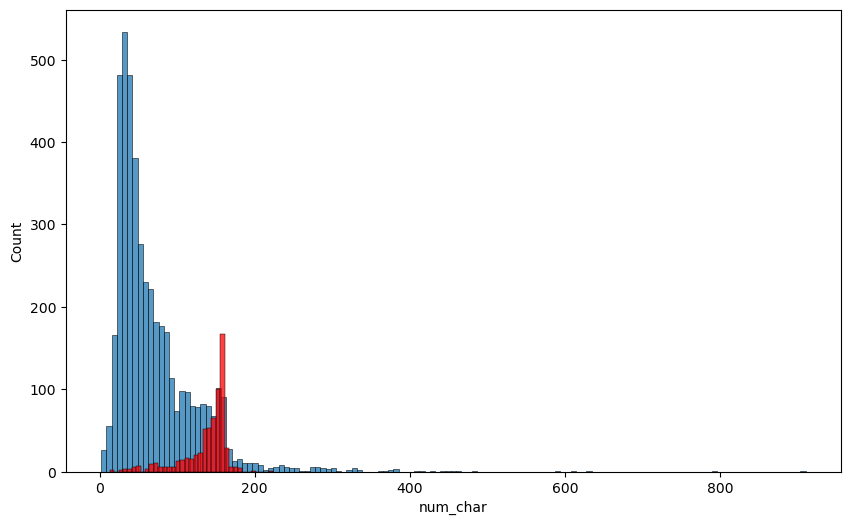

In [66]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'], color='red')

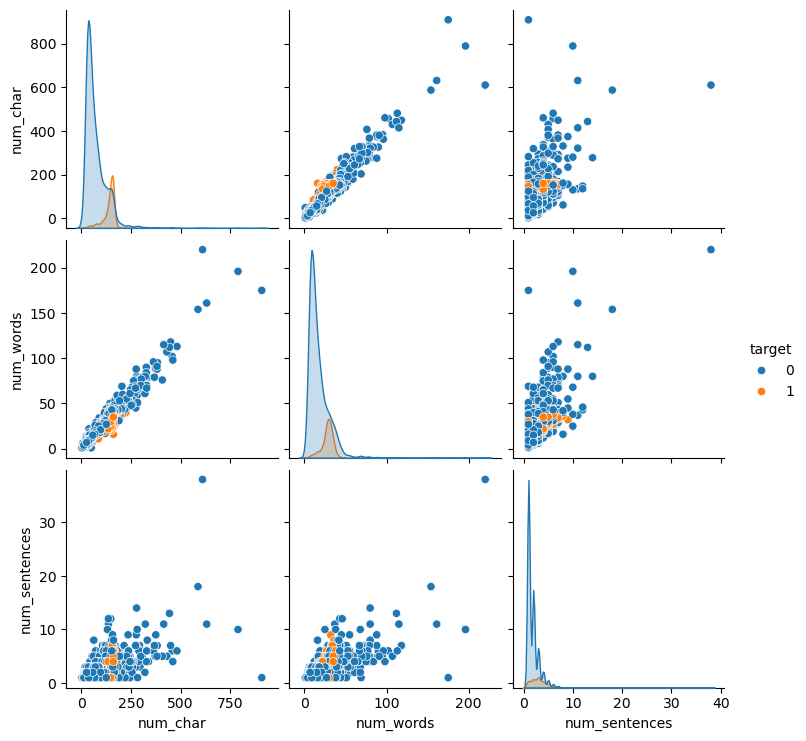

In [67]:
# plotted pair plot to see if we have some pattern
sns.pairplot(df,hue='target')

<Axes: >

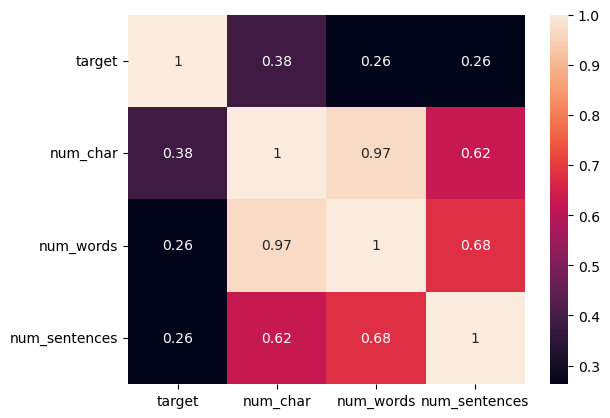

In [71]:
# creating a heatmap of the correation matrix, and we can clearly see that in our dataset num_char has strong correlation with our target.
sns.heatmap(df[['target','num_char','num_words','num_sentences']].corr(), annot=True)

3. Data Preprocessing
       .Lower Case
       .Tokenization
       .Removing special characters
       .Removing stop words and punctuation
       .Stemming

In [98]:
# Creating a function which can perform all the above steps in one go
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [99]:
transform_text('Hi my name is SHAHBAJ ALI@34 &* and i loved to dancing')

'hi name shahbaj ali 34 love danc'

In [81]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shahb\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [85]:
import  string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [93]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [100]:
from nltk.corpus import stopwords


In [102]:
# apply transfrom_text function to our text column
df['transfrom_text'] = df['text'].apply(transform_text)

In [103]:
df.head()

,target,text,num_char,num_words,num_sentences,transfrom_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [116]:
# Trying to plot most occuring words in spam
spam_corpus = []
for msg in df[df['target']==1]['transfrom_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [133]:
from collections import Counter
df2 = pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['words','frequency'])

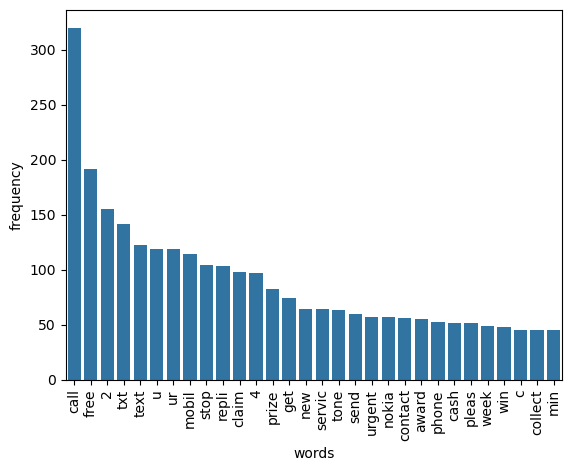

In [139]:
sns.barplot(df2,x='words',y='frequency')
plt.xticks(rotation='vertical')
plt.show()

In [153]:
# As we have non numberic column in our dataset, first we will convert that into numeric values (Vectorization)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [154]:
X = tfidf.fit_transform(df['transfrom_text']).toarray()

In [143]:
y = df['target'].values

In [155]:
# Now we will do train, test spli
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [156]:
# First we will apply Naive Bayes as we know that Naive Bayes perform better on textual dataset, importing different type of NB
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [157]:
# Making object for each NB with default settings
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [158]:
# Training and tesing Gaussing NB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [159]:
# Training and tesing Multinomial NB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [160]:
# Training and tesing Bernoulli NB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [161]:
# In out case scenario precision is more important than accuracy so we are considering -> Multinomial NB with TF-IDF Vectorization
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))